## Plot Training Metrics
This notebook reads the training logs and visualizes episode rewards and TD loss. It skips loss plotting if the TensorBoard logs directory is missing.

version 2: add loss

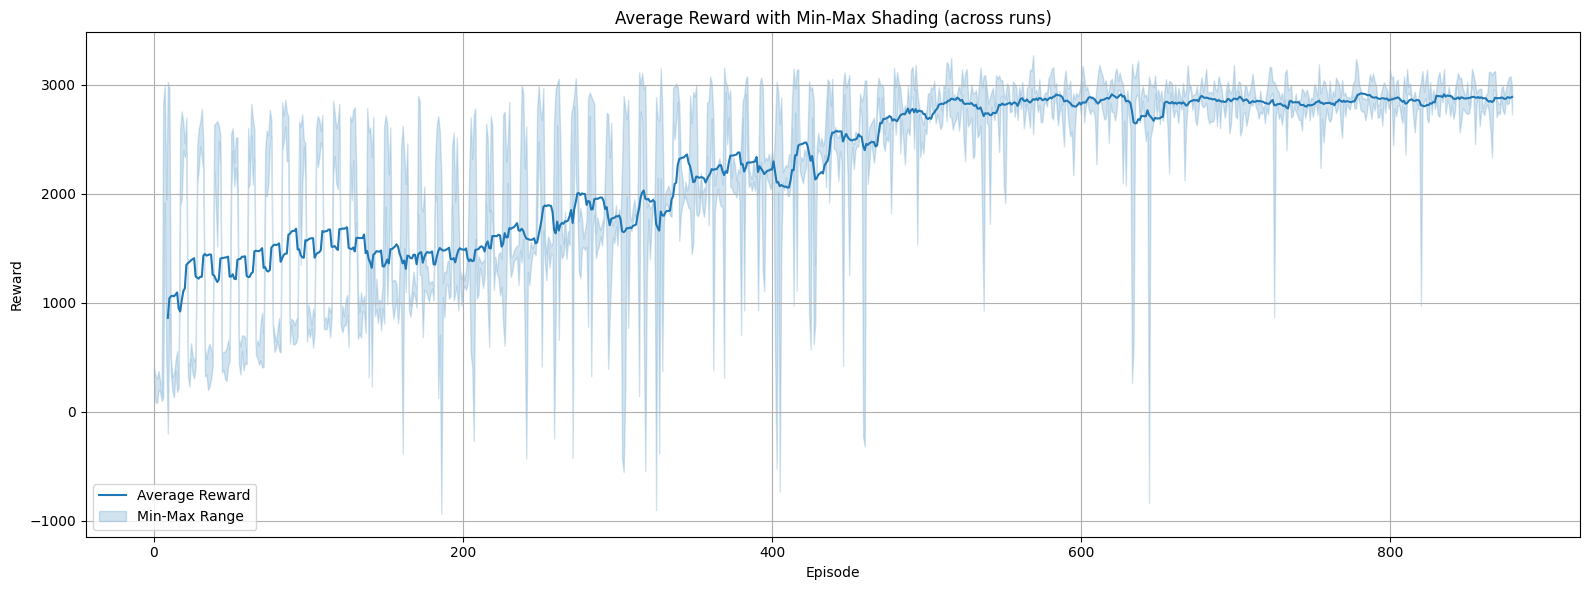

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Ë®≠ÂÆöË∑ØÂæëËàáÊêúÂ∞ãÊâÄÊúâ reward Ê™îÊ°à
base_dir = r"C:\Users\young\Documents\5G-SAC-RAC-KD\logs"
monitor_files = sorted(glob.glob(os.path.join(base_dir, "monitor_run*.csv.monitor.csv")))

all_rewards = []

# ËÆÄÂèñÊØèÂÄãÊ™îÊ°àÁöÑ reward ÂÄº
for path in monitor_files:
    try:
        df = pd.read_csv(path, skiprows=1)
        if "r" in df.columns:
            all_rewards.append(df["r"].reset_index(drop=True))  # ÈáçË®≠ index ‰ª•‰æøÂ∞çÈΩä
    except Exception as e:
        print(f"‚ùå Failed to read {path}: {e}")

# Â∞áÊâÄÊúâ reward Âêà‰ΩµÁÇ∫ DataFrameÔºàÊØèÊ¨Ñ‰∏ÄÂÄã runÔºâ
reward_df = pd.DataFrame(all_rewards).T  # transpose ÂæåÊØèË°åÁÇ∫ episode

# Ë®àÁÆóÂπ≥ÂùáÂÄºËàáÊúÄÂ§ß/ÊúÄÂ∞èÂçÄÈñì
mean_reward = reward_df.mean(axis=1).rolling(window=10).mean()
min_reward = reward_df.min(axis=1)
max_reward = reward_df.max(axis=1)

# Áπ™Âúñ
plt.figure(figsize=(16, 6))
x = np.arange(len(mean_reward))
plt.plot(x, mean_reward, label="Average Reward", color="tab:blue")
plt.fill_between(x, min_reward, max_reward, color="tab:blue", alpha=0.2, label="Min-Max Range")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Average Reward with Min-Max Shading (across runs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


üîç Found 3 TensorBoard event files.
‚úÖ Run 1: Loaded 200 steps
‚úÖ Run 2: Loaded 200 steps
‚úÖ Run 3: Loaded 200 steps


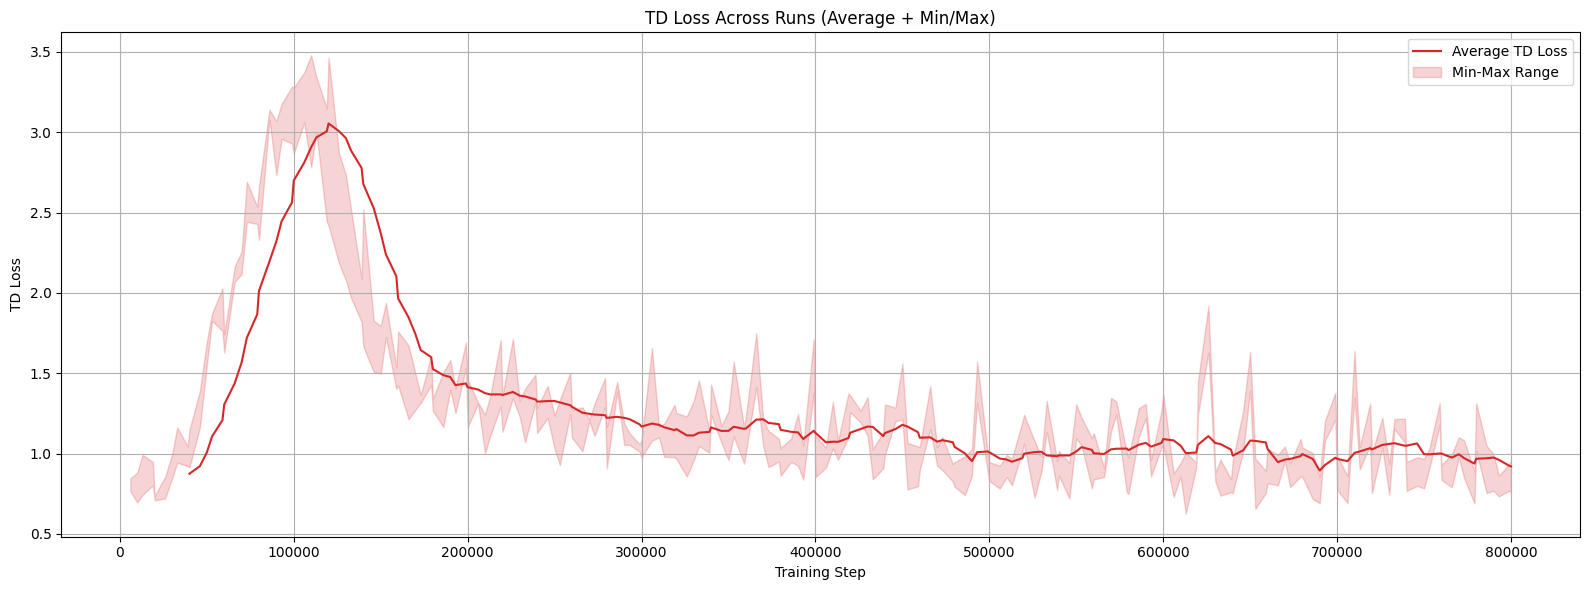

In [2]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Ë®≠ÂÆö TensorBoard logs Ë≥áÊñôÂ§æ
tb_root = r"C:\Users\young\Documents\5G-SAC-RAC-KD\logs\tensorboard"
event_files = glob.glob(os.path.join(tb_root, '**', 'events.out.tfevents*'), recursive=True)

print(f"üîç Found {len(event_files)} TensorBoard event files.")

# Êî∂ÈõÜÊâÄÊúâ run ÁöÑ loss Â∫èÂàóÔºà‰ª• step Â∞çÈΩäÔºâ
all_losses = []
max_step = 0

for i, path in enumerate(event_files):
    try:
        ea = EventAccumulator(path)
        ea.Reload()
        if "train/loss" in ea.Tags()["scalars"]:
            evs = ea.Scalars("train/loss")
            steps = [e.step for e in evs]
            losses = [e.value for e in evs]
            series = pd.Series(losses, index=steps)
            all_losses.append(series)
            max_step = max(max_step, steps[-1])
            print(f"‚úÖ Run {i+1}: Loaded {len(steps)} steps")
        else:
            print(f"‚ö†Ô∏è Run {i+1}: 'train/loss' not found")
    except Exception as e:
        print(f"‚ùå Run {i+1} failed to load: {e}")

# Â∞çÈΩäÊâÄÊúâ Series ‚Üí DataFrameÔºàÊØèÊ¨Ñ‰∏ÄÂÄã runÔºâ
loss_df = pd.DataFrame(all_losses).T.sort_index()

# Ë®àÁÆóÁµ±Ë®àÈáè
mean_loss = loss_df.mean(axis=1).rolling(window=10).mean()
min_loss = loss_df.min(axis=1)
max_loss = loss_df.max(axis=1)

# Áï´Âúñ
plt.figure(figsize=(16, 6))
x = mean_loss.index
plt.plot(x, mean_loss, color="tab:red", label="Average TD Loss")
plt.fill_between(x, min_loss, max_loss, color="tab:red", alpha=0.2, label="Min-Max Range")
plt.xlabel("Training Step")
plt.ylabel("TD Loss")
plt.title("TD Loss Across Runs (Average + Min/Max)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
